In [1]:
#Aunalytics Test
#Nikita Mary Sobers(nsobers@umich.edu)
#Perform a segmentation study on the
#dataset to display useful information using any visualization library

In [2]:
#Imports
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [3]:
#Reading the training test
au_train = pd.read_csv(r"~/Documents/DSTest/au_train.csv",sep=',')
#Reading the test test
au_test = pd.read_csv(r"~/Documents/DSTest/au_test.csv",sep=',')


In [4]:
#Let's look at the different features in our test set
au_test.head() #Gives the first five dataset rows


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
#Nneed to create our class label, 1-class above 50K, 0- below 50K
#Note: When I saw the dataset in the pdf, few of the columns contained "?"
#Preprocessing- remove "?"
#We can do one-hot encoding for the rest of the categorical data since there is no ranking between them.
#We can also use Label encoder also
#Need to normalize 

au_test.replace(' ?', np.nan, inplace=True)
au_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [6]:
#Now fill the NaN with 0s
au_test = au_test.fillna(0)
au_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,0,103497,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,0,321403,HS-grad,9,Widowed,0,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [7]:
#Looking at the statistical details of our training set dataset
au_test.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [8]:
#Looking at the statistical details, normalization is definately needed especially for age, fnlwgt, education-num..etc

In [9]:
#Creating a new column for our final class label and Initially set the value to zero 
au_test['label']=0
au_test.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,0
4,18,0,103497,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,United-States,<=50K.,0


In [10]:


#df.apply(lambda x: func(x['col1'],x['col2']),axis=1)
au_test['label'] = au_test.apply(lambda row: 1 if '>50K'in row['class'] else 0, axis=1)


In [11]:
#dropping class
au_test = au_test.drop(['class'], axis=1)
au_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,0,103497,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,United-States,0


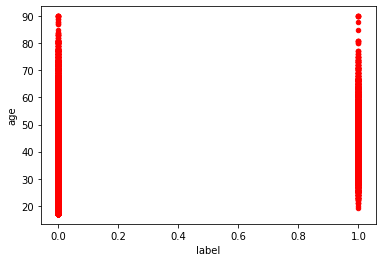

In [12]:
au_test.plot(x ='label', y='age', kind = 'scatter', color='red')
plt.show()

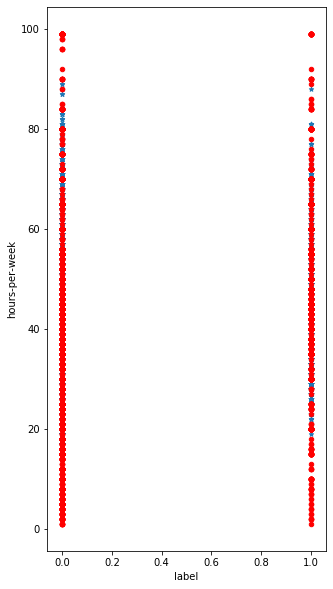

In [13]:
#lets visualize features in training set
#Let's see how age and income are correlated by a plot
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(5,10))
# gca stands for 'get current axis'
ax = plt.gca()
au_test.plot(kind='scatter',x='label',y='age',ax=ax, marker='*')
au_test.plot(kind='scatter',x='label',y='hours-per-week', color='red', ax=ax)

plt.show()

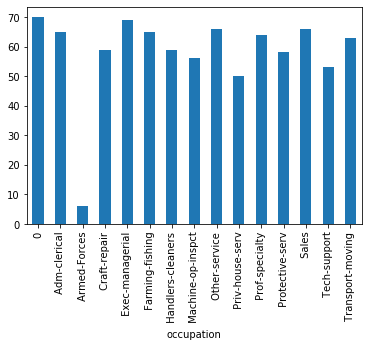

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

au_test.groupby('occupation')['age'].nunique().plot(kind='bar')
plt.show()

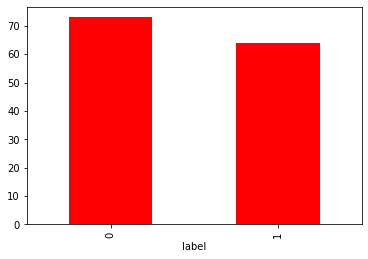

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

au_test.groupby('label')['age'].nunique().plot(kind='bar', color='red')
plt.show()

<Figure size 720x720 with 0 Axes>

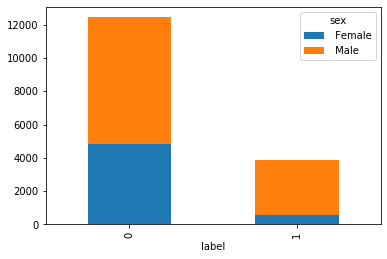

In [16]:
#what if we want to know which income bracket have more females
plt.figure(figsize=(10,10))
au_test.groupby(['label','sex']).size().unstack().plot(kind='bar',stacked=True)

plt.show()

In [17]:
#Below 50K income has more females

<Figure size 720x1440 with 0 Axes>

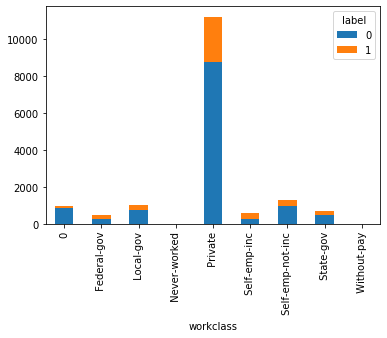

In [18]:
#what if we want to know which income bracket has which workclasses
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10,20))
au_test.groupby(['workclass','label']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [19]:
#Private employees have income more than 50K

<Figure size 720x1440 with 0 Axes>

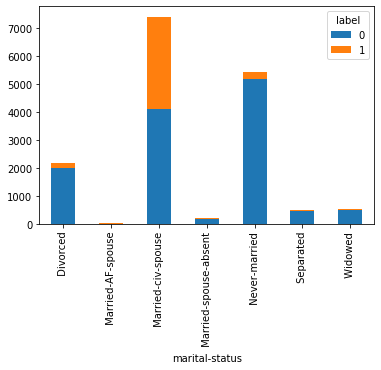

In [20]:
#what if we want to know which income bracket has most never married employees
#0= less than 50K
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10,20))
au_test.groupby(['marital-status','label']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [21]:
#Income less than 50K has most never married employees

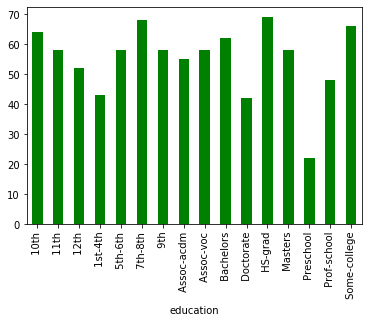

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

au_test.groupby('education')['age'].nunique().plot(kind='bar', color='green')
plt.show()

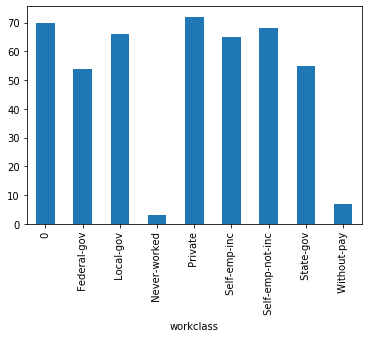

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

au_test.groupby('workclass')['age'].nunique().plot(kind='bar')
plt.show()

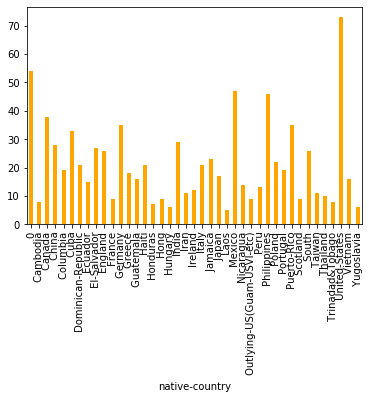

In [24]:
 import matplotlib.pyplot as plt
import pandas as pd

au_test.groupby('native-country')['age'].nunique().plot(kind='bar', color='orange')
plt.show()

In [25]:
#let's try to draw a line in our age vs income graph
#findd slope and intercept first
from scipy.stats import linregress
x1 = au_test.label
y1 =au_test.age
stats = linregress(x1, y1)

m = stats.slope
b = stats.intercept



In [26]:
#slope
m

7.278823423141992

In [27]:
#intercept
b

37.048009650180944

(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Text yticklabel objects>)

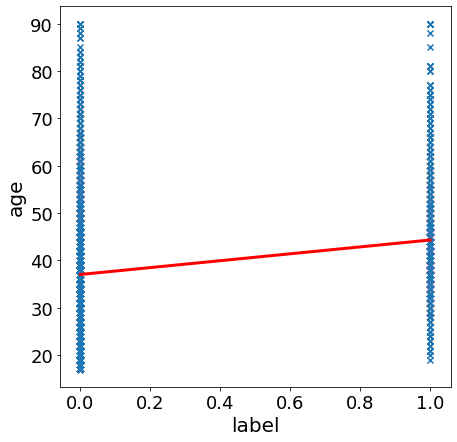

In [28]:
# Change the default figure size
plt.figure(figsize=(7,7))

# Change the default marker for the scatter from circles to x's
plt.scatter(x1, y1, marker='x')

# Set the linewidth on the regression line to 3px
plt.plot(x1, m * x1 + b, color="red", linewidth=3)

# Add x and y lables, and set their font size
plt.xlabel("label", fontsize=20)
plt.ylabel("age", fontsize=20)

# Set the font size of the number lables on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)



In [29]:
au_train.shape

(32561, 15)

In [30]:
#Repeating same for Training set--->

In [31]:
#Replace ? with NaN
au_train.replace(' ?', np.nan, inplace=True)

#Now fill the NaN with 0s
au_train = au_train.fillna(0)
#Creating a new column for our final class label and Initially set the value to zero 
au_train['label']=0
au_train


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [32]:
#df.apply(lambda x: func(x['col1'],x['col2']),axis=1)
au_train['label'] = au_train.apply(lambda row: 1 if '>50K'in row['class'] else 0, axis=1)


In [33]:
#dropping class column and native country 
au_train = au_train.drop(['class'], axis=1)


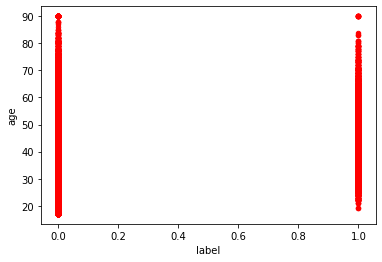

In [34]:
au_train.plot(x ='label', y='age', kind = 'scatter', color='red')
plt.show()

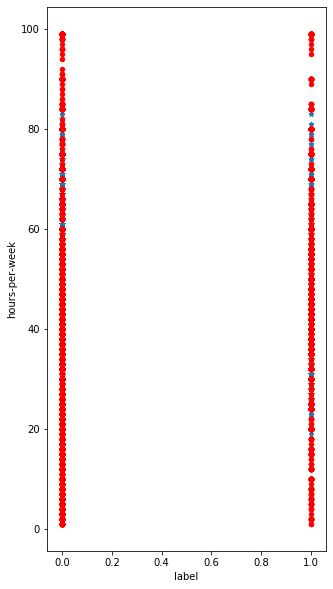

In [35]:
#lets visualize features in training set
#Let's see how age and income are correlated by a plot
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(5,10))
# gca stands for 'get current axis'
ax = plt.gca()
au_train.plot(kind='scatter',x='label',y='age',ax=ax, marker='*')
au_train.plot(kind='scatter',x='label',y='hours-per-week', color='red', ax=ax)

plt.show()

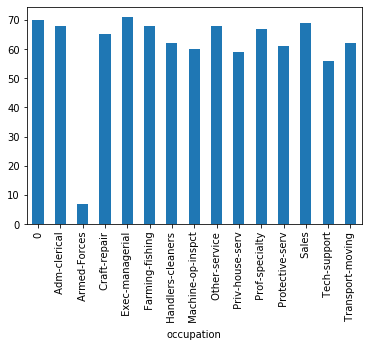

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

au_train.groupby('occupation')['age'].nunique().plot(kind='bar')
plt.show()

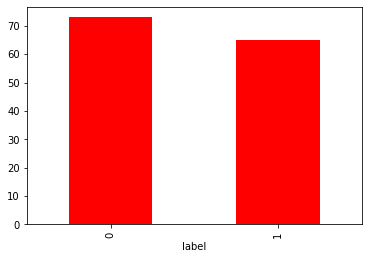

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

au_train.groupby('label')['age'].nunique().plot(kind='bar', color='red')
plt.show()

<Figure size 720x720 with 0 Axes>

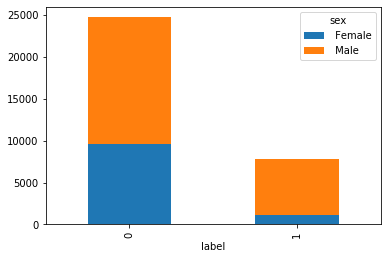

In [38]:
#what if we want to know which income bracket have more females
plt.figure(figsize=(10,10))
au_train.groupby(['label','sex']).size().unstack().plot(kind='bar',stacked=True)

plt.show()

In [39]:
#Still below 50K income has more females 

<Figure size 720x1440 with 0 Axes>

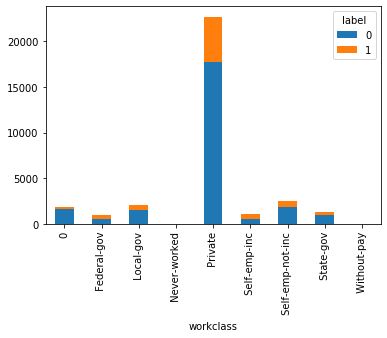

In [40]:
#what if we want to know which income bracket has which workclasses
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10,20))
au_train.groupby(['workclass','label']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [41]:
#Still private employees have income more than 50K

<Figure size 720x1440 with 0 Axes>

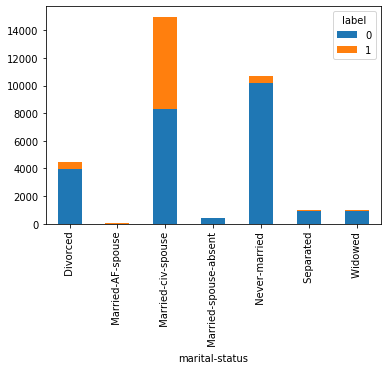

In [42]:
#what if we want to know which income bracket has most never married employees
#0= less than 50K
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10,20))
au_train.groupby(['marital-status','label']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [43]:
#Again, income less than 50K has most never married employees

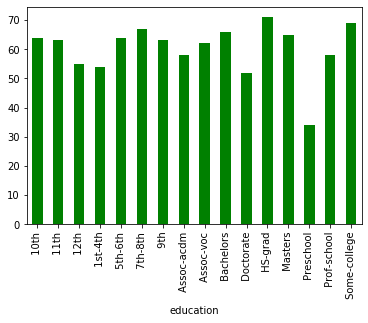

In [44]:

au_train.groupby('education')['age'].nunique().plot(kind='bar', color='green')
plt.show()

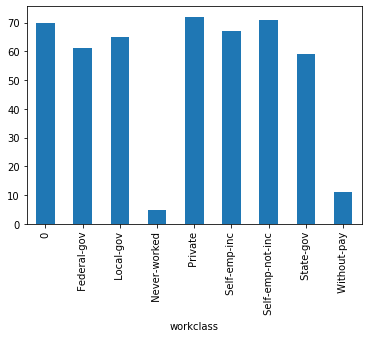

In [45]:
au_train.groupby('workclass')['age'].nunique().plot(kind='bar')
plt.show()

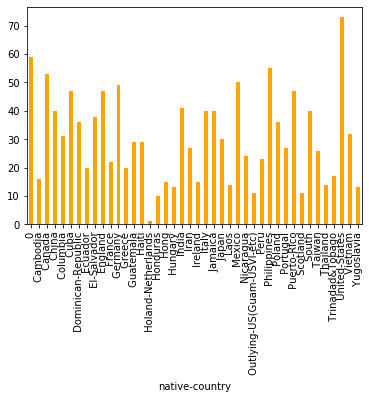

In [46]:
au_train.groupby('native-country')['age'].nunique().plot(kind='bar', color='orange')
plt.show()